### Analyzing the Perceptual Phenomenon

In this project, we will analyze the stroop data, to find out if Congruency affect the time of the tests or not.


In [1]:
#To analyze the stroopdata, we need to import some libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import scipy

In [3]:
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### (1) What is the independent variable? What is the dependent variable?
#### Independent variable : 
    The congruency is a independent variable.
#### Dependent variable :
    The Time(in seconds) is dependent variable

### (2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
(a)The appropriate set hypothesis are:
   ##### Null Hypothesis : 
   Congruency does not affect the time to complete the congruency test.
   ##### Alternate Hypothesis : 
   Congruency does affect the time to complete the congruency test, i.e. congruent test takes less time than incongruent tests.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
#let's explore the data
mean_congruent = df['Congruent'].mean()
mean_incongruent = df['Incongruent'].mean()
mean_congruent, mean_incongruent

(14.051125000000004, 22.01591666666667)

In [5]:
std_congruent = df['Congruent'].std()
std_incongruent = df['Incongruent'].std()
std_congruent, std_incongruent

(3.559357957645195, 4.797057122469138)

In [6]:
df.shape

(24, 2)

In [7]:
bootsample = df.sample(10)

In [9]:
diffs_con = []
diffs_incon = []
for _ in range(10000):
    diff = bootsample['Congruent'].sample(5).mean()
    diffs_con.append(diff)

In [10]:
for _ in range(10000):
    diff = bootsample['Incongruent'].sample(5).mean()
    diffs_incon.append(diff)

In [12]:
diffs_con_np = np.array(diffs_con)
diffs_incon_np = np.array(diffs_incon)

In [14]:
diffs_con_np.mean(), diffs_incon_np.mean()

(13.451499380000003, 21.09409858)

In [15]:
np.percentile(diffs_con_np, 2.5), np.percentile(diffs_con_np, 97.5)

(11.396, 15.505599999999998)

In [17]:
np.percentile(diffs_incon_np, 2.5), np.percentile(diffs_incon_np, 97.5)

(18.284200000000002, 23.858800000000002)

### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5, 1.0, 'Time Taken To Complete Congruency Test')

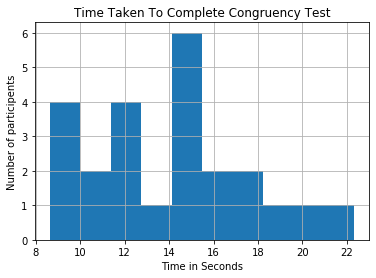

In [6]:
df['Congruent'].hist()
plt.xlabel("Time in Seconds")
plt.ylabel("Number of participents")
plt.title("Time Taken To Complete Congruency Test")

Text(0.5, 1.0, 'Time Taken To Complete Congruency Test')

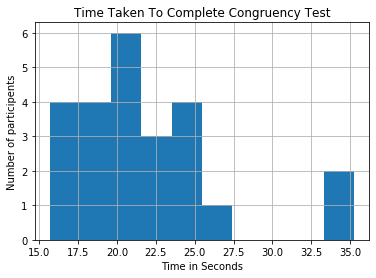

In [7]:
df['Incongruent'].hist()
plt.xlabel("Time in Seconds")
plt.ylabel("Number of participents")
plt.title("Time Taken To Complete Congruency Test")

{'whiskers': [<matplotlib.lines.Line2D at 0x17807948708>,
 'caps': [<matplotlib.lines.Line2D at 0x1780794ff88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17807948588>,
 'medians': [<matplotlib.lines.Line2D at 0x17807954f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x17807954908>,
 'means': []}

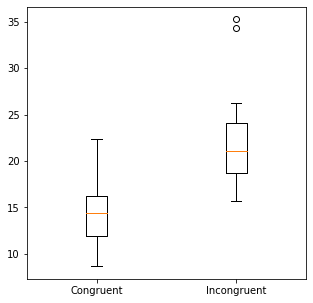

In [8]:
#Now, lets compare congruent and incongruent tests
data_to_plot = [df['Congruent'], df['Incongruent']]
plt.figure(figsize = (5, 5))
plt.boxplot(data_to_plot, labels = ["Congruent", "Incongruent"])

From above plots, we can see that, congruent data is approx. normally distributed. But with some outliers, 
Incongruent data is somehow right scewed.


In [9]:
mean_congruent

14.051125000000004

In [10]:
mean_incongruent

22.01591666666667

In [11]:
df['Difference'] = df['Congruent'] - df['Incongruent']

In [12]:
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [13]:
mean_diff = mean_congruent - mean_incongruent
mean_diff

-7.964791666666665

In [14]:
df['Difference'].mean()

-7.964791666666667

In [15]:
df['Difference'].std()

4.864826910359056

In [16]:
df.sample(5)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
21,14.233,17.960,-3.727
11,15.298,18.644,-3.346
7,8.987,17.394,-8.407
18,11.344,17.425,-6.081


In [18]:
c_diffs = []
inc_diffs = []
for _ in range(10000):
    diff = df['Congruent'].sample(10).mean()
    c_diffs.append(diff)

In [19]:
for _ in range(10000):
    diff = df['Incongruent'].sample(10).mean()
    inc_diffs.append(diff)

In [21]:
c_diff = np.array(c_diffs)
inc_diff = np.array(inc_diffs)
diff_mean = inc_diff - c_diff

In [22]:
diff_mean.mean()

7.939441760000001

Text(0.5, 0, 'Difference in Probability')

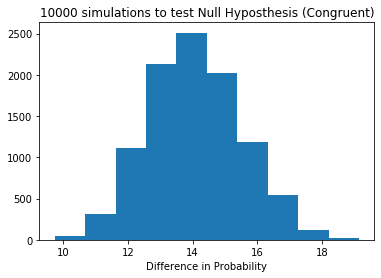

In [20]:
plt.hist(c_diff)
plt.title('10000 simulations to test Null Hyposthesis (Congruent)')
plt.xlabel('Difference in Probability')

Text(0.5, 0, 'Difference in Probability')

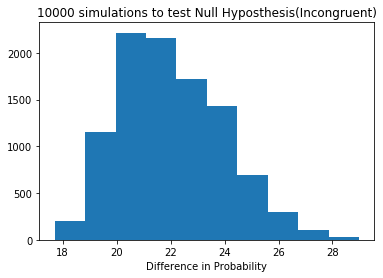

In [21]:
plt.hist(inc_diff)
plt.title('10000 simulations to test Null Hyposthesis(Incongruent)')
plt.xlabel('Difference in Probability')

Text(0.5, 0, 'Difference in Probabilities')

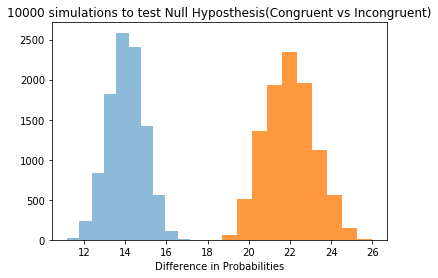

In [27]:
plt.hist(c_diffs, alpha = 0.5, label = 'Congruent')
plt.hist(inc_diffs, alpha = 0.8, label = 'Incongruent')
plt.title('10000 simulations to test Null Hyposthesis(Congruent vs Incongruent)')
plt.xlabel("Difference in Probabilities")

In [28]:
c_upper, c_lower = np.percentile(c_diffs, 2.5), np.percentile(c_diffs, 97.5)
c_upper, c_lower

(12.369795000000002, 15.743222500000002)

In [29]:
inc_upper, inc_lower = np.percentile(inc_diffs, 2.5), np.percentile(inc_diffs, 97.5)
inc_upper, inc_lower

(19.8787875, 24.3359725)

As we can see above, with 95% confidence interval, congruent test's cutoff is  15.74(upper bound), while incongruent test's cutoff is 19.87(lower bound). They do not overlap at all. We can definately say that, there is difference between congruency for congruent and incongruent tests.
So, to accept the null hypothesis, the distributions should overlap without 5% on end.

We can <b>reject the null hypothesis.</b>

<b>Result:</b> As the distributions do not overlap, we can reject the null hypothesis. Also, it is clear that, the congruency test takes little less time when it is congruent.


From the above hypothesis, we can say that 'Congruency' does influence the time taken to complete the test.

If the color and word are same, then we can easily recognize the color with little efforts to say the word/color(as both are same). But if word does not match with color, we need to put extra effort to ignore the text and concentrate on the color of text. It takes the extra time than color with same text. So, we can conclude that, if word matches with color, it takes less time than word that does not matches with color.